<a href="https://colab.research.google.com/github/npgovintarajan/AIML-notebooks/blob/main/Predict_Annual_Turnover_of_Restaurants_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal:


The goal of this problem is to predict the Annual Turnover of a restaurant based on the variables provided in the data set.


### Metric to measure

The measure of accuracy will be RMSE (Root mean square error)


The predicted Annual Turnover for each restaurant in the Test dataset will be compared with the actual Annual Turnover to calculate the RMSE value of the entire prediction. The lower the RMSE value, the better the model will be.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no
from datetime import date

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Python-course/hackathon/Annual_Turnover')

Mounted at /content/drive


In [4]:
os.listdir()

['Train_dataset_1.csv',
 'Test_dataset_1.csv',
 'Sample_Solution_1.csv',
 'Data_Dictionary_1.csv',
 'hackthon.ipynb']

In [5]:
# load in the dataset into a pandas dataframe : Train dataset
df = pd.read_csv('Train_dataset_1.csv')
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [6]:
#Shape of the Original dataset
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 3493
Number of columns: 34


In [7]:
if(len(df) == len(df['Registration Number'].unique())):
    print('No duplicate data found')
else:
    print('Some Duplicates are found')

No duplicate data found


In [8]:
df.columns

Index(['Registration Number', 'Annual Turnover', 'Cuisine', 'City',
       'Restaurant Location', 'Opening Day of Restaurant',
       'Facebook Popularity Quotient', 'Endorsed By',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating',
       'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy'],
      dtype='object')

# Removed all irrelevant columns

In [9]:
df.drop(columns=['Registration Number'],inplace=True)

## Null values

In [10]:
#Missing value analysis
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
27,Live Sports Rating,3288,94.131119
26,Value Deals Rating,2707,77.497853
25,Comedy Gigs Rating,2483,71.085027
24,Live Music Rating,765,21.900945
23,Overall Restaurant Rating,212,6.069281
5,Facebook Popularity Quotient,99,2.834240
7,Instagram Popularity Quotient,56,1.603206
13,Resturant Tier,49,1.402806
28,Ambience,25,0.715717
20,Value for Money,0,0.000000


<Axes: >

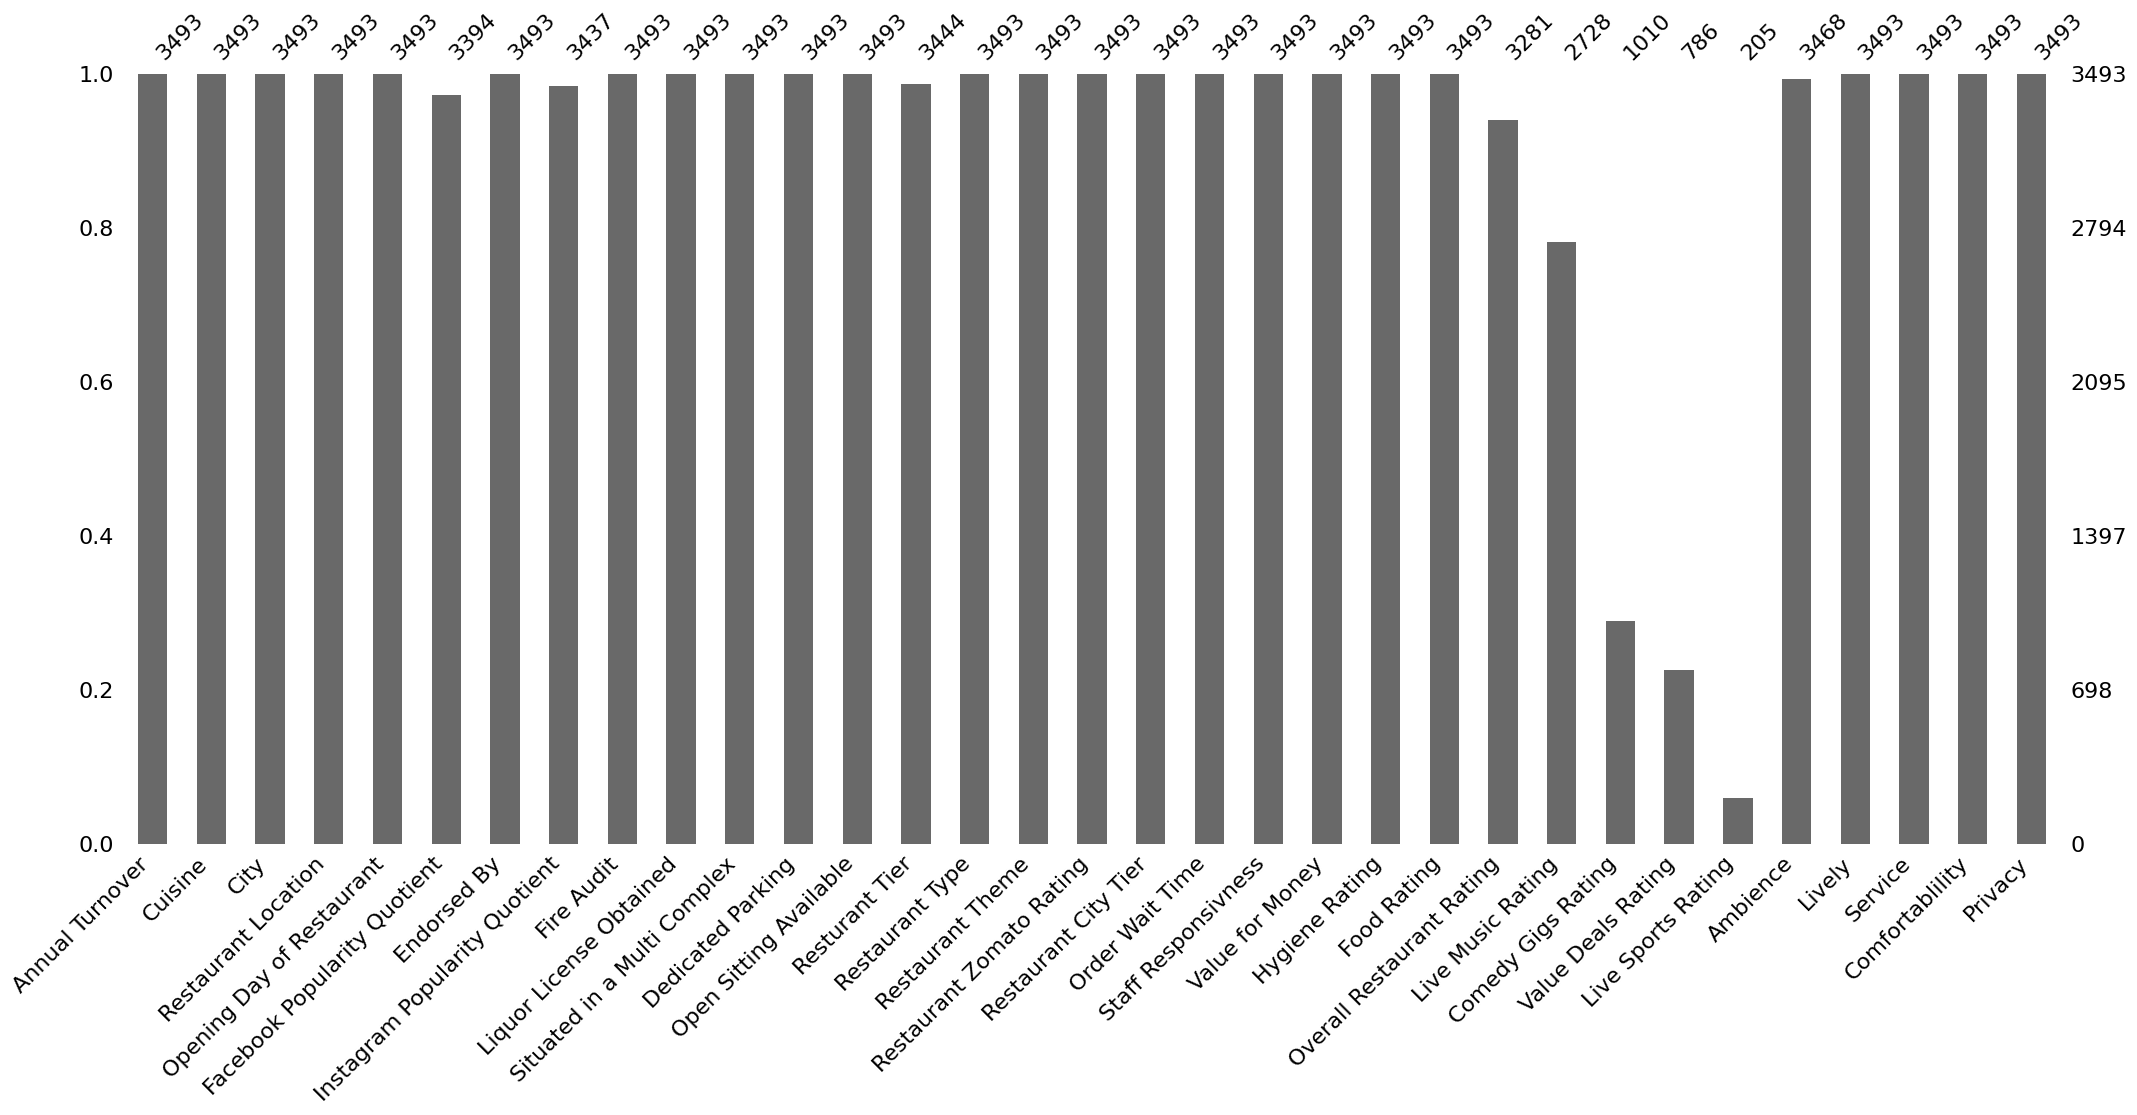

In [11]:
no.bar(df)

In [12]:
# We will drop the columns which are having more than 50% NULL Values
null_columns=null_df[null_df['% Null values']>=50]['Features']
df.drop(columns=null_columns,inplace=True)
#df.columns                 ##Columns present in the dataset
np.array(null_columns)     ##Columns that are removed

array(['Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating'],
      dtype=object)

In [13]:
# Dropping the rows which are having less tham 5% of null values in that column
null_df_5=null_df[null_df['% Null values']<5]['Features']
df.dropna(subset=null_df_5 ,axis=0, inplace=True)

In [14]:
### Reset index
df.reset_index(drop=True, inplace=True)

In [15]:
df.shape

(3279, 30)

In [16]:
df[['Overall Restaurant Rating','Live Music Rating']].mode()

,Overall Restaurant Rating,Live Music Rating
0,9.0,4.0


In [17]:
df['Overall Restaurant Rating'].value_counts()

Overall Restaurant Rating
9.0     955
10.0    810
7.0     550
8.0     496
6.0     269
Name: count, dtype: int64

In [18]:
df['Live Music Rating'].value_counts()

Live Music Rating
4.0    1044
3.0     631
5.0     592
6.0     152
2.0      92
1.0      29
7.0      12
8.0       1
Name: count, dtype: int64

In [19]:
## Importing Simple Imputer to treat the null values
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation

SI1 = SimpleImputer(strategy='most_frequent')

## Fitting the Simple Imputer function to get the mean of the variable

SI1.fit(df[['Overall Restaurant Rating','Live Music Rating']])

SimpleImputer(strategy='most_frequent')

In [20]:
## Transforming the variable --> Imputing the variable with its mean

IPQ = SI1.transform(df[['Overall Restaurant Rating','Live Music Rating']])
df_ipq=pd.DataFrame(data=IPQ , columns=['Overall Restaurant Rating1','Live Music Rating1'])

In [21]:
df_ipq.isnull().sum()

Overall Restaurant Rating1    0
Live Music Rating1            0
dtype: int64

In [22]:
df_ipq[['Overall Restaurant Rating1','Live Music Rating1']].mode()

,Overall Restaurant Rating1,Live Music Rating1
0,9.0,4.0


In [23]:
df_ipq['Live Music Rating1'].value_counts()

Live Music Rating1
4.0    1770
3.0     631
5.0     592
6.0     152
2.0      92
1.0      29
7.0      12
8.0       1
Name: count, dtype: int64

In [24]:
df_ipq['Overall Restaurant Rating1'].value_counts()

Overall Restaurant Rating1
9.0     1154
10.0     810
7.0      550
8.0      496
6.0      269
Name: count, dtype: int64

In [25]:
df[['Overall Restaurant Rating','Live Music Rating']]=df_ipq[['Overall Restaurant Rating1','Live Music Rating1']]

In [26]:
df.isnull().sum()

Annual Turnover                  0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Ambience                         0
Lively                           0
Service                          0
Comfortablility     

## Categories/Unique values in each column

In [27]:
#Checking number of unique values in each column. We should remove the columns that has single value.
#Those columns will not give us meaningful information
unique_val=pd.DataFrame()
unique_val['Features']=df.nunique().index
unique_val['Unique_Values']=df.nunique().values
unique_val.sort_values(by='Unique_Values')

,Features,Unique_Values
10,Situated in a Multi Complex,2
17,Restaurant City Tier,2
13,Resturant Tier,2
3,Restaurant Location,2
12,Open Sitting Available,2
11,Dedicated Parking,2
9,Liquor License Obtained,2
8,Fire Audit,2
6,Endorsed By,3
14,Restaurant Type,4


### Check unique value count in each category

In [28]:
df_cat=df.select_dtypes('object')
for i in range(len(df_cat.columns)):
    print(' ---- ' ,(df_cat.columns[i]) ,' ----  ')
    x=df_cat.iloc[:,i].value_counts()
    print(x)
    print('\n***********************************************')

 ----  Cuisine  ----  
Cuisine
tibetan,greek          645
welsh,thai             323
tibetan,italian        263
indian,irish           255
british,japanese       255
turkish,nigerian       212
japanese,thai          185
chinese,salvadorian    149
algerian,belgian       147
turkish,sapnish        138
peruvian,cuban         110
polish,jewish          109
swedish,greek           89
algerian,korean         81
irish,belgian           80
cuban,british           76
algerian,algerian       60
hawaiian,latvian        44
british,belgian         37
nigerian,cajun          21
Name: count, dtype: int64

***********************************************
 ----  City  ----  
City
Bangalore                                 525
-1                                        369
Noida                                     304
Hyderabad                                 276
Pune                                      247
Chennai                                   226
New Delhi                                 164
Gurgaon

# Feature Engineering

In [29]:
# here after we will use df1
df1=df.copy()

In [30]:
df1.columns

Index(['Annual Turnover', 'Cuisine', 'City', 'Restaurant Location',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Endorsed By', 'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy'],
      dtype='object')

In [31]:
# Function to remove spaces in the left & right of the string & convert it into the lower case
def lower_case(x):
    x=x.strip()
    return x.lower()


## City

In [32]:
df1['City']=df1['City'].apply(lambda x: lower_case(x))

In [33]:
#df['City'].value_counts()

In [34]:
# Cities having count less than 10 should be removed
city_value_count = df1['City'].value_counts()
#city_value_count
city_10 = city_value_count[city_value_count<10].index
array1=np.array(city_10)
#array1

In [35]:
# Impute those values with null
df1['City']=df1['City'].apply(lambda x : None if x in city_10 else x)

In [36]:
df1.isnull().sum()

Annual Turnover                    0
Cuisine                            0
City                             300
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient       0
Endorsed By                        0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating          0
Live Music Rating                  0
Ambience                           0
Lively                             0
S

In [37]:
df1.shape

(3279, 30)

In [38]:
# Now remove null values in the city
df1.dropna(subset=['City'], inplace=True)
df1.reset_index(drop=True,inplace=True)

In [39]:
df1.shape

(2979, 30)

## Opening Day of Restaurant

In [40]:
# Find current date &  find total months from the Opening day of the restaurants
current=date.today()
current.year
df['Opening Day of Restaurant'].str.split(pat='-',expand=True)[2]

0       2009
1       2008
2       2011
3       2008
4       2011
        ... 
3274    2009
3275    2012
3276    2009
3277    2008
3278    2009
Name: 2, Length: 3279, dtype: object

In [41]:
import datetime
now = datetime.date.today()
today = pd.Timestamp(now)

df1['Opening Day of Restaurant']= pd.to_datetime(df['Opening Day of Restaurant'])
df1['Opening_days'] = today
df1['Opening_days']= df1['Opening_days'].sub(df1['Opening Day of Restaurant'], axis=0).dt.days

In [43]:
df1.head(2)

,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,Opening_days
0,42000000,"indian,irish",bangalore,Near Business Hub,2009-02-14,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,8.0,8,6,6,6,5537
1,50000000,"indian,irish",indore,Near Party Hub,2008-09-29,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,4.0,5.0,7,7,3,8,5675


In [44]:
# Drop Opening day of Restaurant column because we have calculated total numer of days of opening till today
df1.drop(columns=['Opening Day of Restaurant'],inplace=True)

In [45]:
df1.shape

(2979, 30)

## Restaurant Type

In [46]:
df1['Restaurant Type'].value_counts()

Restaurant Type
Bar           2762
Caffee         184
Gastro Bar      33
Name: count, dtype: int64

## Restaurant Theme

In [47]:
df1['Restaurant Theme'].value_counts()

Restaurant Theme
Arabian      1205
Greek         873
90's          526
Nature        116
Parsi          88
Chinese        59
Delicio        19
Molino         16
English        14
Belise         13
Moonrise        9
Downtown        7
TheGem          6
Carbone         4
Mise En         4
Umami           3
Picante         3
Petit           2
Savory          2
Benedicta       2
Cafepro         1
Flavors         1
LaCuisine       1
Marco           1
Spoon           1
Resca           1
Bakery          1
Ambiance        1
Name: count, dtype: int64

In [48]:
# Theme having count less than 10 should be removed
theme_value_count = df1['Restaurant Theme'].value_counts()
#theme_value_count
theme_10 = theme_value_count[theme_value_count<10].index
array2=np.array(theme_10)
array2

array(['Moonrise', 'Downtown', 'TheGem', 'Carbone', 'Mise En', 'Umami',
       'Picante', 'Petit', 'Savory', 'Benedicta', 'Cafepro', 'Flavors',
       'LaCuisine', 'Marco', 'Spoon', 'Resca', 'Bakery', 'Ambiance'],
      dtype=object)

In [49]:
# Impute those values with null
df1['Restaurant Theme']=df1['Restaurant Theme'].apply(lambda x : None if x in theme_10 else x)

In [50]:
#df1.isnull().sum()

In [51]:
df1.shape

(2979, 30)

In [52]:
# Now remove null values in the city
df1.dropna(subset=['Restaurant Theme'], inplace=True)
df1.reset_index(drop=True,inplace=True)

In [53]:
df1.shape

(2929, 30)

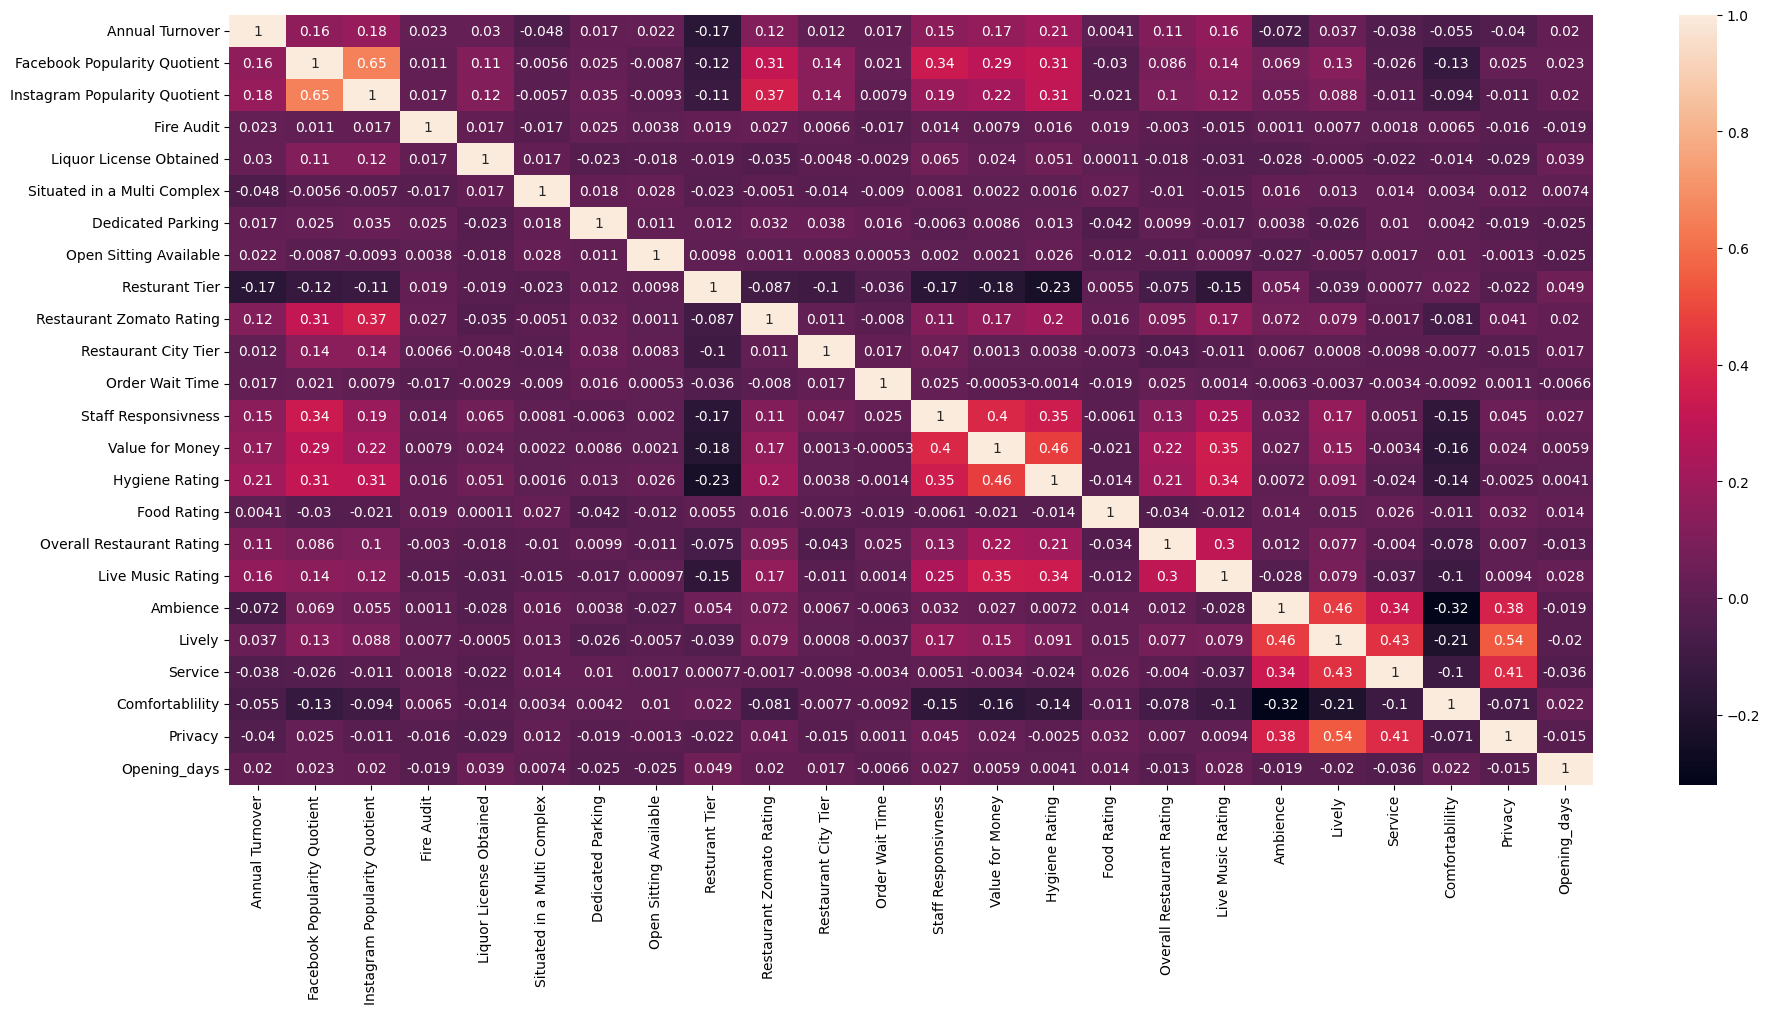

In [55]:
# Example of one-hot encoding the 'Cuisine' column
one_hot = pd.get_dummies(df1['Cuisine'])
df1_encoded = df1.drop('Cuisine', axis=1).join(one_hot)

# Then you can calculate the correlation matrix as before
numeric_df = df1_encoded.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [56]:
df1.head(2)

,Annual Turnover,Cuisine,City,Restaurant Location,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,Opening_days
0,42000000,"indian,irish",bangalore,Near Business Hub,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,8.0,8,6,6,6,5537
1,50000000,"indian,irish",indore,Near Party Hub,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,4.0,5.0,7,7,3,8,5675


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                2929 non-null   int64  
 1   Cuisine                        2929 non-null   object 
 2   City                           2929 non-null   object 
 3   Restaurant Location            2929 non-null   object 
 4   Facebook Popularity Quotient   2929 non-null   float64
 5   Endorsed By                    2929 non-null   object 
 6   Instagram Popularity Quotient  2929 non-null   float64
 7   Fire Audit                     2929 non-null   int64  
 8   Liquor License Obtained        2929 non-null   int64  
 9   Situated in a Multi Complex    2929 non-null   int64  
 10  Dedicated Parking              2929 non-null   int64  
 11  Open Sitting Available         2929 non-null   int64  
 12  Resturant Tier                 2929 non-null   f

## Train test split

## Label encoding & scaling

In [58]:
df2=df1.copy()

In [ ]:
df_cat=df2.select_dtypes('object')
for i in range(len(df_cat.columns)):
    print(' ---- ' ,(df_cat.columns[i]) ,' ----  ')
    x=df_cat.iloc[:,i].value_counts()
    print(x)
    print('\n***********************************************')

### Cuisine

In [59]:
df.shape

(3279, 30)

In [60]:
cuisine=df2['Cuisine'].value_counts().index
for cat_var in cuisine:
    df2['Cuisine_'+cat_var]=np.where(df2['Cuisine']==cat_var, 1,0)
df2.shape

(2929, 50)

### City

In [61]:
city=df2['City'].value_counts().index
for cat_var in city:
    df2['City_'+cat_var]=np.where(df2['City']==cat_var, 1,0)
df2.shape

(2929, 78)

### Restaurant Location

In [62]:
location=df2['Restaurant Location'].value_counts().index
for cat_var in location:
    df2['Restaurant Location_'+cat_var]=np.where(df2['Restaurant Location']==cat_var, 1,0)
df2.shape

(2929, 80)

### Endorsed By

In [63]:
endorsed=df2['Endorsed By'].value_counts().index
for cat_var in endorsed:
    df2['Endorsed By_'+cat_var]=np.where(df2['Endorsed By']==cat_var, 1,0)
df2.shape

(2929, 83)

### Restaurant Type

In [64]:
rtype=df2['Restaurant Type'].value_counts().index
for cat_var in rtype:
    df2['Restaurant Type_'+cat_var]=np.where(df2['Restaurant Type']==cat_var, 1,0)
df2.shape

(2929, 86)

### Restaurant Theme

In [65]:
theme=df2['Restaurant Theme'].value_counts().index
for cat_var in theme:
    df2['Restaurant Theme_'+cat_var]=np.where(df2['Restaurant Theme']==cat_var, 1,0)
df2.shape

(2929, 96)

### Drop all the columns which are encoded

In [66]:
df2.drop(columns=['Cuisine', 'City', 'Restaurant Location', 'Endorsed By','Restaurant Type', 'Restaurant Theme'],inplace=True)

## Train test split

In [67]:
df2.reset_index(drop=True,inplace=True)

In [68]:
x = df2.drop('Annual Turnover', axis=1)
y = df2['Annual Turnover']
print('Shape of X = ', x.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2929, 89)
Shape of y =  (2929,)


In [69]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
#Using Sequential Feature selection technique and applying forward substitution
lr=LinearRegression()
sfs_forward=SequentialFeatureSelector(lr,k_features="best")
sfs_forward.fit(x,y)
sfs_forward.k_feature_names_

('Instagram Popularity Quotient',
 'Situated in a Multi Complex',
 'Dedicated Parking',
 'Open Sitting Available',
 'Resturant Tier',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Staff Responsivness',
 'Hygiene Rating',
 'Overall Restaurant Rating',
 'Ambience',
 'Lively',
 'Cuisine_welsh,thai',
 'Cuisine_tibetan,italian',
 'Cuisine_indian,irish',
 'Cuisine_japanese,thai',
 'Cuisine_turkish,sapnish',
 'Cuisine_chinese,salvadorian',
 'Cuisine_algerian,belgian',
 'Cuisine_swedish,greek',
 'Cuisine_algerian,korean',
 'Cuisine_irish,belgian',
 'Cuisine_cuban,british',
 'City_bangalore',
 'City_pune',
 'City_chennai',
 'City_kolkata',
 'City_mumbai',
 'City_jaipur',
 'City_lucknow',
 'City_bhubaneswar',
 'City_indore',
 'City_ghaziabad',
 'City_faridabad',
 'City_kochi/cochin',
 'City_mangalore',
 'Restaurant Location_Near Party Hub',
 'Restaurant Location_Near Business Hub',
 'Endorsed By_Local Celebrity',
 'Restaurant Theme_Greek',
 'Restaurant Theme_Parsi',
 'Restaurant Theme_

In [72]:
#Using Sequential Feature selection technique and applying backward elimination
sfs_backward=SequentialFeatureSelector(lr,k_features=25,forward=False)
sfs_backward.fit(x,y)
sfs_backward.k_feature_names_

('Instagram Popularity Quotient',
 'Situated in a Multi Complex',
 'Resturant Tier',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Staff Responsivness',
 'Hygiene Rating',
 'Overall Restaurant Rating',
 'Ambience',
 'Lively',
 'Cuisine_welsh,thai',
 'Cuisine_tibetan,italian',
 'Cuisine_indian,irish',
 'Cuisine_turkish,sapnish',
 'Cuisine_chinese,salvadorian',
 'Cuisine_swedish,greek',
 'Cuisine_algerian,korean',
 'Cuisine_irish,belgian',
 'Cuisine_cuban,british',
 'City_bangalore',
 'City_pune',
 'City_mumbai',
 'City_lucknow',
 'City_bhubaneswar',
 'Endorsed By_Local Celebrity')

#Using Sequential Feature selection technique and applying backward elimination
sfs_backward=SequentialFeatureSelector(lr,k_features="best",forward=False)
sfs_backward.fit(x,y)
sfs_backward.k_feature_names_

In [73]:
x=x[['Instagram Popularity Quotient',
 'Situated in a Multi Complex',
 'Dedicated Parking',
 'Open Sitting Available',
 'Resturant Tier',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Staff Responsivness',
 'Hygiene Rating',
 'Overall Restaurant Rating',
 'Ambience',
 'Lively',
 'Cuisine_welsh,thai',
 'Cuisine_tibetan,italian',
 'Cuisine_indian,irish',
 'Cuisine_turkish,sapnish',
 'Cuisine_chinese,salvadorian',
 'Cuisine_algerian,belgian',
 'Cuisine_swedish,greek',
 'Cuisine_algerian,korean',
 'Cuisine_irish,belgian',
 'Cuisine_cuban,british',
 'City_bangalore',
 'City_pune',
 'City_kolkata',
 'City_mumbai',
 'City_lucknow',
 'City_bhubaneswar',
 'City_faridabad',
 'City_kochi/cochin',
 'City_mangalore',
 'Endorsed By_Local Celebrity']]


In [74]:
x.shape

(2929, 32)

In [75]:
x.reset_index(drop=True)

,Instagram Popularity Quotient,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Staff Responsivness,Hygiene Rating,Overall Restaurant Rating,Ambience,Lively,"Cuisine_welsh,thai","Cuisine_tibetan,italian","Cuisine_indian,irish","Cuisine_turkish,sapnish","Cuisine_chinese,salvadorian","Cuisine_algerian,belgian","Cuisine_swedish,greek","Cuisine_algerian,korean","Cuisine_irish,belgian","Cuisine_cuban,british",City_bangalore,City_pune,City_kolkata,City_mumbai,City_lucknow,City_bhubaneswar,City_faridabad,City_kochi/cochin,City_mangalore,Endorsed By_Local Celebrity
0,95.80,1,0,1,2.0,3,0,5,5,10.0,8.0,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,85.00,1,1,0,2.0,3,0,6,7,9.0,5.0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68.20,1,1,0,2.0,3,0,6,3,8.0,7.0,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,83.60,1,1,1,1.0,3,1,6,6,9.0,7.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,87.00,1,1,1,2.0,3,0,5,6,9.0,6.0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,62.11,0,1,1,2.0,4,0,5,6,9.0,7.0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2925,96.30,0,1,0,2.0,3,0,4,7,9.0,4.0,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2926,86.80,1,1,0,2.0,3,1,5,6,8.0,6.0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2927,86.00,1,1,1,2.0,3,1,5,5,7.0,7.0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (2050, 32)
Shape of y_train =  (2050,)
Shape of X_test =  (879, 32)
Shape of y_test =  (879,)


In [77]:
X_train.head()

,Instagram Popularity Quotient,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Staff Responsivness,Hygiene Rating,Overall Restaurant Rating,Ambience,Lively,"Cuisine_welsh,thai","Cuisine_tibetan,italian","Cuisine_indian,irish","Cuisine_turkish,sapnish","Cuisine_chinese,salvadorian","Cuisine_algerian,belgian","Cuisine_swedish,greek","Cuisine_algerian,korean","Cuisine_irish,belgian","Cuisine_cuban,british",City_bangalore,City_pune,City_kolkata,City_mumbai,City_lucknow,City_bhubaneswar,City_faridabad,City_kochi/cochin,City_mangalore,Endorsed By_Local Celebrity
2097,74.40,1,1,1,1.0,3,0,5,6,9.0,6.0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,68.40,1,0,1,2.0,3,1,5,6,9.0,5.0,8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2488,61.33,0,0,1,2.0,3,1,4,4,9.0,9.0,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
522,67.20,1,0,1,2.0,3,0,4,3,8.0,7.0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1858,85.20,1,1,1,2.0,3,1,6,3,8.0,6.0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_train=pd.DataFrame(data=X_train ,columns=x.columns )
X_train.reset_index(drop=True,inplace=True)


X_test = sc.transform(X_test)
X_test=pd.DataFrame(data=X_test ,columns=x.columns )
X_test.reset_index(drop=True,inplace=True)
X_test.head()


y_train.reset_index(drop=True, inplace=True)

In [79]:
X_train.head()

,Instagram Popularity Quotient,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,Staff Responsivness,Hygiene Rating,Overall Restaurant Rating,Ambience,Lively,"Cuisine_welsh,thai","Cuisine_tibetan,italian","Cuisine_indian,irish","Cuisine_turkish,sapnish","Cuisine_chinese,salvadorian","Cuisine_algerian,belgian","Cuisine_swedish,greek","Cuisine_algerian,korean","Cuisine_irish,belgian","Cuisine_cuban,british",City_bangalore,City_pune,City_kolkata,City_mumbai,City_lucknow,City_bhubaneswar,City_faridabad,City_kochi/cochin,City_mangalore,Endorsed By_Local Celebrity
0,-0.015573,0.492366,0.487773,0.512926,-3.472366,0.387799,-0.671427,0.426365,1.052872,0.385052,-0.231905,1.151404,3.084286,-0.311196,-0.279964,-0.200203,-0.202824,-0.196215,-0.172143,-0.154842,-0.154842,-0.151506,-0.480096,-0.304550,-0.179515,-0.179515,-0.096721,-0.085855,-0.073449,-0.062592,-0.058535,-0.085855
1,-0.562387,0.492366,-2.050133,0.512926,0.287988,0.387799,1.489366,0.426365,1.052872,0.385052,-0.717506,0.598234,-0.324224,-0.311196,-0.279964,-0.200203,-0.202824,-0.196215,-0.172143,-0.154842,-0.154842,6.600395,-0.480096,-0.304550,5.570570,-0.179515,-0.096721,-0.085855,-0.073449,-0.062592,-0.058535,-0.085855
2,-1.206717,-2.031010,-2.050133,0.512926,0.287988,0.387799,1.489366,-0.493686,-0.546526,0.385052,1.224901,1.151404,-0.324224,-0.311196,-0.279964,-0.200203,-0.202824,-0.196215,-0.172143,-0.154842,-0.154842,-0.151506,-0.480096,3.283536,-0.179515,-0.179515,-0.096721,-0.085855,-0.073449,-0.062592,-0.058535,-0.085855
3,-0.671750,0.492366,-2.050133,0.512926,0.287988,0.387799,-0.671427,-0.493686,-1.346225,-0.425375,0.253697,-1.061278,-0.324224,-0.311196,-0.279964,-0.200203,-0.202824,-0.196215,-0.172143,6.458199,-0.154842,-0.151506,-0.480096,-0.304550,-0.179515,-0.179515,-0.096721,-0.085855,-0.073449,-0.062592,-0.058535,-0.085855
4,0.968694,0.492366,0.487773,0.512926,0.287988,0.387799,1.489366,1.346416,-1.346225,-0.425375,-0.231905,-1.061278,-0.324224,-0.311196,-0.279964,-0.200203,-0.202824,-0.196215,-0.172143,-0.154842,-0.154842,-0.151506,-0.480096,3.283536,-0.179515,-0.179515,-0.096721,-0.085855,-0.073449,-0.062592,-0.058535,-0.085855


# MODEL BUILDING

In [80]:
import statsmodels.api as sm

In [81]:
xtrain_constant=sm.add_constant(X_train)

model=sm.OLS(y_train,xtrain_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Annual Turnover   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     9.162
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           1.40e-40
Time:                        05:55:01   Log-Likelihood:                -37530.
No. Observations:                2050   AIC:                         7.513e+04
Df Residuals:                    2017   BIC:                         7.531e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3.129e+07   4.81e+05     65.042      0.000    3.03e+07    3.22e+07
Instagram Popularity Quotient  1.671e+06   5.52e+05      3.027      0.003    5.88e+05    2.75e+06
Situated in a Multi Complex   -1.389e+06   4.84e+05     -2.867      0.004   -2.34e+06   -4.39e+05
Dedicated Parking              3.727e+05   4.85e+05      0.768      0.443   -5.79e+05    1.32e+06
Open Sitting Available         6.721e+05   4.85e+05      1.386      0.166   -2.79e+05    1.62e+06
Resturant Tier                -2.642e+06    5.1e+05     -5.184      0.000   -3.64e+06   -1.64e+06
Restaurant Zomato Rating       9.883e+05   5.34e+05      1.852      0.064   -5.85e+04    2.03e+06
Restaurant City Tier          -4.839e+05   5.01e+05     -0.965      0.335   -1.47e+06       5e+05
Staff Responsivness            1.215e+06   5.28e+05      2.302      0.021     1.8e+05    2.25e+06
Hygiene Rating                 2.464e+06   5.51e+05      4.469      0.000    1.38e+06    3.55e+06
Overall Restaurant Rating       9.58e+05   4.99e+05      1.919      0.055    -2.1e+04    1.94e+06
Ambience                      -2.693e+06   5.51e+05     -4.883      0.000   -3.77e+06   -1.61e+06
Lively                         7.393e+05   5.57e+05      1.328      0.184   -3.52e+05    1.83e+06
Cuisine_welsh,thai             -1.53e+06   5.03e+05     -3.045      0.002   -2.52e+06   -5.45e+05
Cuisine_tibetan,italian       -8.371e+05   4.98e+05     -1.680      0.093   -1.81e+06     1.4e+05
Cuisine_indian,irish          -7.765e+05   4.98e+05     -1.561      0.119   -1.75e+06    1.99e+05
Cuisine_turkish,sapnish       -1.818e+06   4.93e+05     -3.687      0.000   -2.79e+06   -8.51e+05
Cuisine_chinese,salvadorian   -1.741e+06    4.9e+05     -3.551      0.000    -2.7e+06   -7.79e+05
Cuisine_algerian,belgian      -3.794e+05    4.9e+05     -0.775      0.439   -1.34e+06    5.81e+05
Cuisine_swedish,greek         -1.546e+06    4.9e+05     -3.156      0.002   -2.51e+06   -5.85e+05
Cuisine_algerian,korean       -7.933e+05   4.88e+05     -1.627      0.104   -1.75e+06    1.63e+05
Cuisine_irish,belgian         -1.542e+06   4.88e+05     -3.156      0.002    -2.5e+06   -5.84e+05
Cuisine_cuban,british         -8.172e+05   4.88e+05     -1.674      0.094   -1.77e+06     1.4e+05
City_bangalore                 2.374e+06   5.01e+05      4.737      0.000    1.39e+06    3.36e+06
City_pune                      7.605e+05   4.94e+05      1.539      0.124   -2.08e+05    1.73e+06
City_kolkata                  -7.044e+05   4.95e+05     -1.423      0.155   -1.68e+06    2.66e+05
City_mumbai                    1.877e+06   4.89e+05      3.839      0.000    9.18e+05    2.84e+06
City_lucknow                  -7.474e+05   4.87e+05     -1.535      0.125    -1.7e+06    2.08e+05
City_bhubaneswar              -6.867e+05   4.

In [82]:
model.pvalues[model.pvalues<0.05]

const                            0.000000e+00
Instagram Popularity Quotient    2.501772e-03
Situated in a Multi Complex      4.182234e-03
Resturant Tier                   2.393061e-07
Staff Responsivness              2.145627e-02
Hygiene Rating                   8.309525e-06
Ambience                         1.129077e-06
Cuisine_welsh,thai               2.356783e-03
Cuisine_turkish,sapnish          2.326889e-04
Cuisine_chinese,salvadorian      3.931680e-04
Cuisine_swedish,greek            1.625288e-03
Cuisine_irish,belgian            1.620906e-03
City_bangalore                   2.322273e-06
City_mumbai                      1.274720e-04
dtype: float64

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [84]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [85]:
#Linear regression
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.13460156956023173, 15177575.066379115)

In [86]:
# Lasso
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.13460166750676128, 15177574.20747367)

In [87]:
# Ridge
lr_ridge.fit(X_train, y_train)
lr_ridge_score=lr_ridge.score(X_test, y_test) # with balcony 0.5162364637824872
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score, lr_ridge_rmse

(0.13468123584614233, 15176876.446632996)

### HYPERPARAMER TUNNING

In [88]:
from sklearn.model_selection import GridSearchCV

In [91]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

params = {'lasso__alpha': np.logspace(-8, 8, 100)}  # Notice the 'lasso__' prefix

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Use the pipeline in GridSearchCV
grid_model = GridSearchCV(pipe, params, cv=10, scoring='neg_mean_squared_error')
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-0...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])},
             scoring='neg_mean_squared_error')

In [92]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

TypeError: Lasso.__init__() got an unexpected keyword argument 'normalize'

In [93]:
# Lasso
lr_lasso=Lasso(alpha = 220.513073990305)
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.13462315988069917, 15177385.73696625)

In [94]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': np.arange(1,1000)} # It will check from 1e-08 to 1e+08
rd = Ridge()
rd_model = GridSearchCV(rd, params, cv = 10, scoring='neg_mean_squared_error')
rd_model.fit(X_train, y_train)
print(rd_model.best_params_)
print(rd_model.best_score_)

{'alpha': 246}
-479120951691318.7


In [95]:
# Lasso
rd_lasso=Ridge(alpha = 255)
rd_lasso.fit(X_train, y_train)
rd_lasso_score=rd_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
rd_lasso_rmse = rmse(y_test, rd_lasso.predict(X_test))
rd_lasso_score, rd_lasso_rmse

(0.1491083965333857, 15049825.242683306)

In [96]:
from sklearn.linear_model import ElasticNet

En=ElasticNet(random_state=0)
En_para={'alpha': [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95] ,
         'l1_ratio':[0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95]}

GS_En=GridSearchCV(estimator=En , param_grid=En_para ,cv=3)
GS_En.fit(X_train, y_train)
GS_En.best_params_  #Best value of alpha & l1_ratio

{'alpha': 1.45, 'l1_ratio': 0.75}

In [97]:
# Build model using best parameters
en=ElasticNet(alpha=1.45,l1_ratio=0.75,random_state=0)
en.fit(X_train, y_train)

en_score=en.score(X_test, y_test) # with balcony 0.5162364637824872
en_rmse = rmse(y_test, en.predict(X_test))
en_score, en_rmse

(0.1586409671441773, 14965285.922610825)

## CHECK MODEL ACCURACY USING TEST DATASET

In [98]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no
from datetime import date

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [99]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Test_dataset_1.csv')
df.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [100]:
df['Endorsed By']=df['Endoresed By']


In [101]:
#Missing value analysis
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
27,Live Sports Rating,471,94.2
26,Value Deals Rating,385,77.0
25,Comedy Gigs Rating,370,74.0
24,Live Music Rating,102,20.4
23,Overall Restaurant Rating,34,6.8
19,Staff Responsivness,0,0.0
20,Value for Money,0,0.0
21,Hygiene Rating,0,0.0
22,Food Rating,0,0.0
0,Registration Number,0,0.0


In [102]:
# We will drop the columns which are having more than 50% NULL Values
null_columns=null_df[null_df['% Null values']>=50]['Features']
df.drop(columns=null_columns,inplace=True)
#df.columns                 ##Columns present in the dataset
np.array(null_columns)     ##Columns that are removed

array(['Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating'],
      dtype=object)

In [103]:
# Dropping the rows which are having less tham 5% of null values in that column
null_df_5=null_df[null_df['% Null values']<5]['Features']
df.dropna(subset=null_df_5 ,axis=0, inplace=True)

In [104]:
### Reset index
df.reset_index(drop=True, inplace=True)

In [105]:
df[['Overall Restaurant Rating','Live Music Rating']].mode()

,Overall Restaurant Rating,Live Music Rating
0,9.0,4.0


In [106]:
## Importing Simple Imputer to treat the null values
## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation

SI1 = SimpleImputer(strategy='most_frequent')

## Fitting the Simple Imputer function to get the mean of the variable

SI1.fit(df[['Overall Restaurant Rating','Live Music Rating']])

SimpleImputer(strategy='most_frequent')

In [107]:
## Transforming the variable --> Imputing the variable with its mean

IPQ = SI1.transform(df[['Overall Restaurant Rating','Live Music Rating']])
df_ipq=pd.DataFrame(data=IPQ , columns=['Overall Restaurant Rating1','Live Music Rating1'])

In [108]:
df_ipq[['Overall Restaurant Rating1','Live Music Rating1']].mode()

,Overall Restaurant Rating1,Live Music Rating1
0,9.0,4.0


In [109]:
df[['Overall Restaurant Rating','Live Music Rating']]=df_ipq[['Overall Restaurant Rating1','Live Music Rating1']]

In [110]:
# here after we will use df1
df1=df.copy()

In [111]:
# Function to remove spaces in the left & right of the string & convert it into the lower case
def lower_case(x):
    x=x.strip()
    return x.lower()

In [112]:
df1['City']=df1['City'].apply(lambda x: lower_case(x))

In [113]:
# Find current date &  find total months from the Opening day of the restaurants
current=date.today()
current.year
df['Opening Day of Restaurant'].str.split(pat='-',expand=True)[2]

0      2010
1      2011
2      2011
3      2005
4      2008
5      2009
6      2008
7      2003
8      2011
9      2011
10     2010
11     2011
12     2008
13     2010
14     2013
15     2007
16     2009
17     2012
18     2009
19     2010
20     2011
21     2010
22     2008
23     2011
24     2009
25     2009
26     2010
27     2010
28     2010
29     2011
30     2007
31     2009
32     2010
33     2008
34     2010
35     2008
36     2009
37     2010
38     2010
39     2008
40     2011
41     2010
42     2010
43     2007
44     2008
45     2010
46     2009
47     2009
48     2009
49     2009
50     2010
51     2008
52     2008
53     2012
54     2009
55     2008
56     2011
57     2011
58     2009
59     2010
60     2005
61     2010
62     2011
63     2008
64     2009
65     2012
66     2010
67     2010
68     2010
69     2007
70     2011
71     2004
72     2011
73     2010
74     2011
75     2012
76     2011
77     2008
78     2008
79     2008
80     2010
81     2008
82     2012
83  

In [114]:
import datetime
now = datetime.date.today()
today = pd.Timestamp(now)

df1['Opening Day of Restaurant']= pd.to_datetime(df['Opening Day of Restaurant'])
df1['Opening_days'] = today
df1['Opening_days']= df1['Opening_days'].sub(df1['Opening Day of Restaurant'], axis=0).dt.days

In [115]:
# Drop Opening day of Restaurant column because we have calculated total numer of days of opening till today
df1.drop(columns=['Opening Day of Restaurant'],inplace=True)

In [116]:
df2=df1.copy()

In [117]:
cuisine=df2['Cuisine'].value_counts().index
for cat_var in cuisine:
    df2['Cuisine_'+cat_var]=np.where(df2['Cuisine']==cat_var, 1,0)
df2.shape

(500, 51)

In [118]:
city=df2['City'].value_counts().index
for cat_var in city:
    df2['City_'+cat_var]=np.where(df2['City']==cat_var, 1,0)
df2.shape

(500, 125)

In [119]:
location=df2['Restaurant Location'].value_counts().index
for cat_var in location:
    df2['Restaurant Location_'+cat_var]=np.where(df2['Restaurant Location']==cat_var, 1,0)
df2.shape

(500, 127)

In [120]:
endorsed=df2['Endorsed By'].value_counts().index
for cat_var in endorsed:
    df2['Endorsed By_'+cat_var]=np.where(df2['Endorsed By']==cat_var, 1,0)
df2.shape

(500, 130)

In [121]:
rtype=df2['Restaurant Type'].value_counts().index
for cat_var in rtype:
    df2['Restaurant Type_'+cat_var]=np.where(df2['Restaurant Type']==cat_var, 1,0)
df2.shape

(500, 134)

In [122]:
theme=df2['Restaurant Theme'].value_counts().index
for cat_var in theme:
    df2['Restaurant Theme_'+cat_var]=np.where(df2['Restaurant Theme']==cat_var, 1,0)
df2.shape

(500, 152)

In [123]:
df2.drop(columns=['Cuisine', 'City', 'Restaurant Location', 'Endorsed By','Restaurant Type', 'Restaurant Theme'],inplace=True)

In [124]:
df2.shape

(500, 146)

In [125]:
x_testing=df2[['Instagram Popularity Quotient',
 'Situated in a Multi Complex',
 'Dedicated Parking',
 'Open Sitting Available',
 'Resturant Tier',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Staff Responsivness',
 'Hygiene Rating',
 'Overall Restaurant Rating',
 'Ambience',
 'Lively',
 'Cuisine_welsh,thai',
 'Cuisine_tibetan,italian',
 'Cuisine_indian,irish',
 'Cuisine_turkish,sapnish',
 'Cuisine_chinese,salvadorian',
 'Cuisine_algerian,belgian',
 'Cuisine_swedish,greek',
 'Cuisine_algerian,korean',
 'Cuisine_irish,belgian',
 'Cuisine_cuban,british',
 'City_bangalore',
 'City_pune',
 'City_kolkata',
 'City_mumbai',
 'City_lucknow',
 'City_bhubaneswar',
 'City_faridabad',
 'City_kochi/cochin',
 'City_mangalore',
 'Endorsed By_Local Celebrity']]

In [126]:
turnover_tested = en.predict(x_testing)

In [127]:
turnover_tested

array([1.42662637e+08, 1.83342448e+08, 1.61673721e+08, 1.52380675e+08,
       1.78235864e+08, 1.32416791e+08, 1.19825566e+08, 1.28150105e+08,
       1.55258300e+08, 1.32752183e+08, 1.48722215e+08, 1.66689565e+08,
       1.67633370e+08, 1.52524093e+08, 1.37602912e+08, 1.31250175e+08,
       1.66856959e+08, 1.32771479e+08, 1.67144001e+08, 1.44411556e+08,
       1.29361740e+08, 1.59152608e+08, 1.34601457e+08, 1.32783287e+08,
       1.55550562e+08, 1.23065810e+08, 1.74616247e+08, 1.72425892e+08,
       1.59944963e+08, 1.72797947e+08, 1.34620574e+08, 1.59837166e+08,
       1.73235018e+08, 1.74085733e+08, 1.49103812e+08, 1.19849790e+08,
       1.65955248e+08, 1.47596902e+08, 1.43834091e+08, 1.23503356e+08,
       1.73906103e+08, 1.35135845e+08, 1.49729144e+08, 1.30284437e+08,
       1.67986724e+08, 1.53140120e+08, 1.32525250e+08, 1.68146593e+08,
       1.40960145e+08, 1.45031278e+08, 1.67756078e+08, 1.64412943e+08,
       1.29406780e+08, 1.58731953e+08, 1.68732735e+08, 1.47234652e+08,
      

In [128]:
df_answer=pd.DataFrame()
df_answer['Registration Number']=df['Registration Number']
df_answer['Annual Turnover']=turnover_tested

In [129]:
df_answer.head()

,Registration Number,Annual Turnover
0,20001,1.426626e+08
1,20002,1.833424e+08
2,20003,1.616737e+08
3,20004,1.523807e+08
4,20005,1.782359e+08


In [130]:
df_answer.shape

(500, 2)

In [131]:
# Predicted Annual turnover
df_answer.head()

,Registration Number,Annual Turnover
0,20001,1.426626e+08
1,20002,1.833424e+08
2,20003,1.616737e+08
3,20004,1.523807e+08
4,20005,1.782359e+08


In [132]:
# Save Predicted annual turnover into CSV file
df_answer.to_csv('Turnover_submission.csv')